<a href="https://colab.research.google.com/github/Eric881028/-/blob/%E5%B7%A8%E9%87%8F%E8%B3%87%E6%96%99%E4%BD%9C%E6%A5%AD/%E6%9C%9F%E6%9C%AB%E5%A0%B1%E5%91%8A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#instructions
#ETHNICITIES = { 
#    0: "White", 
#    1: "Black",
#    2: "Asian",
#    3: "Indian",
#    4: "Hispanic"
#}
#GENDERS = { 
#    0: "Male", 
#    1: "Female"
#}

#general libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random

#path process
import os
import os.path
from pathlib import Path
import glob

#image process
from PIL import Image
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from keras.applications.vgg16 import preprocess_input, decode_predictions
from keras.preprocessing import image
import skimage
from skimage.feature import hessian_matrix, hessian_matrix_eigvals
from scipy.ndimage.filters import convolve
from skimage import data, io, filters

#scaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from keras import regularizers
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

#accuracy control
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

#optimizer
from keras.optimizers import RMSprop,Adam,Optimizer,Optimizer, SGD

#layers
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization,MaxPooling2D,BatchNormalization,\
                        Permute, TimeDistributed, Bidirectional,GRU, SimpleRNN, LSTM, GlobalAveragePooling2D, SeparableConv2D,\
ZeroPadding2D, Convolution2D, ZeroPadding2D,AveragePooling2D
from keras import models
from keras import layers
import tensorflow as tf
from keras.applications import VGG16,VGG19,inception_v3
from keras import backend as K
from keras.utils import plot_model
from keras.models import load_model
from keras.regularizers import l1,l2,L1L2
from tensorflow.keras import regularizers

#surpass warnings
from warnings import filterwarnings
filterwarnings("ignore",category=DeprecationWarning)
filterwarnings("ignore", category=FutureWarning) 
filterwarnings("ignore", category=UserWarning)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
#define path and perform transformation
Main_G_A_E_Path = pd.read_csv("/content/drive/MyDrive/巨量資料/age_gender.csv")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
print(Main_G_A_E_Path.head(-1))

       age  ethnicity  gender                        img_name  \
0        1          2       0  20161219203650636.jpg.chip.jpg   
1        1          2       0  20161219222752047.jpg.chip.jpg   
2        1          2       0  20161219222832191.jpg.chip.jpg   
3        1          2       0  20161220144911423.jpg.chip.jpg   
4        1          2       0  20161220144914327.jpg.chip.jpg   
...    ...        ...     ...                             ...   
23699   99          0       1  20170120134718759.jpg.chip.jpg   
23700   99          0       1  20170120221920654.jpg.chip.jpg   
23701   99          1       1  20170120134639935.jpg.chip.jpg   
23702   99          2       1  20170110182418864.jpg.chip.jpg   
23703   99          2       1  20170117195405372.jpg.chip.jpg   

                                                  pixels  
0      129 128 128 126 127 130 133 135 139 142 145 14...  
1      164 74 111 168 169 171 175 182 184 188 193 199...  
2      67 70 71 70 69 67 70 79 90 103 116 

In [ ]:
Main_G_A_E_Path = Main_G_A_E_Path.drop("img_name",axis=1)

In [ ]:
print(Main_G_A_E_Path.head())

   age  ethnicity  gender                                             pixels
0    1          2       0  129 128 128 126 127 130 133 135 139 142 145 14...
1    1          2       0  164 74 111 168 169 171 175 182 184 188 193 199...
2    1          2       0  67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3    1          2       0  193 197 198 200 199 200 202 203 204 205 208 21...
4    1          2       0  202 205 209 210 209 209 210 211 212 214 218 21...


In [ ]:
Main_G_A_E_Path["age"] = Main_G_A_E_Path["age"].apply(lambda x: "Teen" if x < 18 else("Middle" if 18 <= x < 55 else "Old"))

In [ ]:
print(Main_G_A_E_Path["age"].value_counts())

Middle    15830
Teen       4233
Old        3642
Name: age, dtype: int64


In [ ]:
print(Main_G_A_E_Path.head(-1))

        age  ethnicity  gender  \
0      Teen          2       0   
1      Teen          2       0   
2      Teen          2       0   
3      Teen          2       0   
4      Teen          2       0   
...     ...        ...     ...   
23699   Old          0       1   
23700   Old          0       1   
23701   Old          1       1   
23702   Old          2       1   
23703   Old          2       1   

                                                  pixels  
0      129 128 128 126 127 130 133 135 139 142 145 14...  
1      164 74 111 168 169 171 175 182 184 188 193 199...  
2      67 70 71 70 69 67 70 79 90 103 116 132 145 155...  
3      193 197 198 200 199 200 202 203 204 205 208 21...  
4      202 205 209 210 209 209 210 211 212 214 218 21...  
...                                                  ...  
23699  206 183 141 116 117 120 110 103 104 111 111 11...  
23700  127 100 94 81 77 77 74 99 102 98 128 145 160 1...  
23701  23 28 32 35 42 47 68 85 98 103 113 117 130 129...  
2

In [ ]:
Encoder_Function = LabelEncoder()

In [ ]:
print("MAIN:")
print(Main_G_A_E_Path["age"].value_counts())
print("---" * 20)
Main_G_A_E_Path["age"] = Encoder_Function.fit_transform(Main_G_A_E_Path["age"])
print("TRANSFORMED:")
print(Main_G_A_E_Path["age"].value_counts())

MAIN:
Middle    15830
Teen       4233
Old        3642
Name: age, dtype: int64
------------------------------------------------------------
TRANSFORMED:
0    15830
2     4233
1     3642
Name: age, dtype: int64


In [ ]:
print(Main_G_A_E_Path.head())

   age  ethnicity  gender                                             pixels
0    2          2       0  129 128 128 126 127 130 133 135 139 142 145 14...
1    2          2       0  164 74 111 168 169 171 175 182 184 188 193 199...
2    2          2       0  67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3    2          2       0  193 197 198 200 199 200 202 203 204 205 208 21...
4    2          2       0  202 205 209 210 209 209 210 211 212 214 218 21...


In [ ]:
Main_G_A_E_Path["pixels"] = Main_G_A_E_Path["pixels"].apply(lambda x: np.array(x.split(),dtype="float32"))
Main_G_A_E_Path["pixels"] = Main_G_A_E_Path["pixels"] / 255.

In [ ]:
print(Main_G_A_E_Path.head())

   age  ethnicity  gender                                             pixels
0    2          2       0  [0.5058824, 0.5019608, 0.5019608, 0.49411765, ...
1    2          2       0  [0.6431373, 0.2901961, 0.43529412, 0.65882355,...
2    2          2       0  [0.2627451, 0.27450982, 0.2784314, 0.27450982,...
3    2          2       0  [0.75686276, 0.77254903, 0.7764706, 0.78431374...
4    2          2       0  [0.7921569, 0.8039216, 0.81960785, 0.8235294, ...


In [ ]:
print("Single Image Shape:")
print(Main_G_A_E_Path["pixels"][0].shape)
print("Total Shape:")
print(Main_G_A_E_Path["pixels"].shape)

Single Image Shape:
(2304,)
Total Shape:
(23705,)


In [ ]:
X_Train = np.zeros(shape=(23705,2304))

for indexing in range(len(Main_G_A_E_Path["pixels"])):
    X_Train[indexing] = Main_G_A_E_Path["pixels"][indexing]

In [ ]:
print(X_Train.shape)

(23705, 2304)


In [ ]:
# "2304 = 48*48"

X_Train = X_Train.reshape(-1,48,48,1)

In [ ]:
print(X_Train.shape)
print(X_Train[0].shape)
print(type(X_Train))

(23705, 48, 48, 1)
(48, 48, 1)
<class 'numpy.ndarray'>


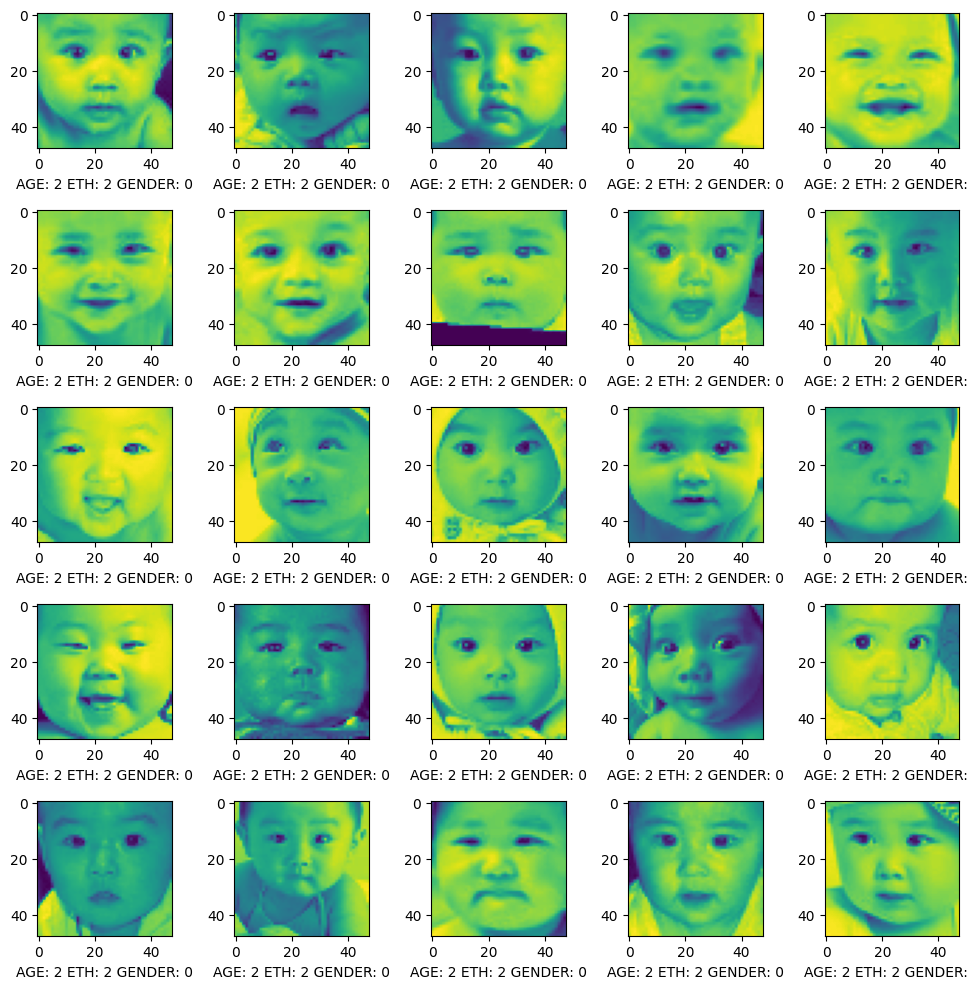

In [ ]:
#displaying data
figure,axis = plt.subplots(5,5,figsize=(10,10))

for indexing,operations in enumerate(axis.flat):
    Picking_Image = X_Train[indexing]
    
    operations.set_xlabel(f"AGE: {str(Main_G_A_E_Path.age.iloc[indexing])} "+f"ETH: {str(Main_G_A_E_Path.ethnicity.iloc[indexing])} "+f"GENDER: {str(Main_G_A_E_Path.gender.iloc[indexing])}")
    operations.imshow(Picking_Image)
    
plt.tight_layout()
plt.show()

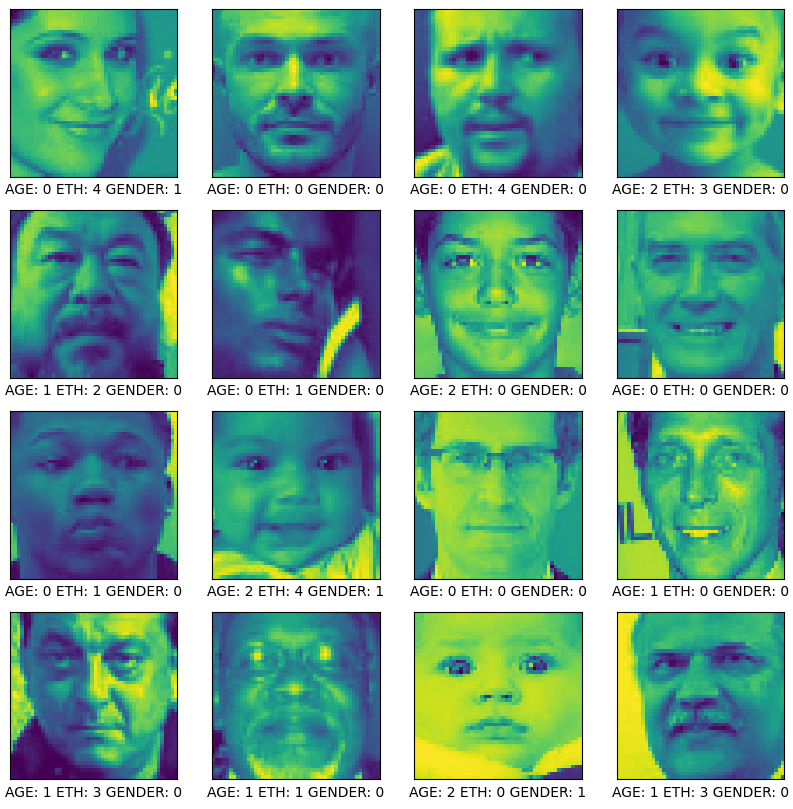

In [ ]:
figure = plt.figure(figsize=(10,10))

random_picking = index=np.random.randint(0,23000,16)

for indexing in range(len(random_picking)):
    plt.subplot(4,4,(indexing%25)+1)
    plt.grid(True)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_Train[random_picking[indexing]])
    
    plt.xlabel(f"AGE: {str(Main_G_A_E_Path.age.iloc[random_picking[indexing]])} "+f"ETH: {str(Main_G_A_E_Path.ethnicity.iloc[random_picking[indexing]])} "+f"GENDER: {str(Main_G_A_E_Path.gender.iloc[random_picking[indexing]])}")

plt.show()

In [ ]:
#prediction data processing
Main_G_A_E_Path["age"] = np.array(Main_G_A_E_Path["age"],dtype="float32")
Main_G_A_E_Path["gender"] = np.array(Main_G_A_E_Path["gender"],dtype="float32")
Main_G_A_E_Path["ethnicity"] = np.array(Main_G_A_E_Path["ethnicity"],dtype="float32")

In [ ]:
#train/test split
X = X_Train # pixels
Y = Main_G_A_E_Path.iloc[:,:-1].values # prediction targets

In [ ]:
print(X.shape)
print(Y.shape)

(23705, 48, 48, 1)
(23705, 3)


In [ ]:
print(type(X))
print(type(Y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
print(Y)

[[2. 2. 0.]
 [2. 2. 0.]
 [2. 2. 0.]
 ...
 [1. 2. 1.]
 [1. 2. 1.]
 [1. 0. 1.]]


In [ ]:
xTrain,xTest,yTrain,yTest = train_test_split(X,Y,train_size=0.9,random_state=42,shuffle=True)

In [ ]:
print(xTrain.shape)
print(xTest.shape)
print(yTrain.shape)
print(yTest.shape)

(21334, 48, 48, 1)
(2371, 48, 48, 1)
(21334, 3)
(2371, 3)


In [ ]:
#general parameters
Early_Stopper = tf.keras.callbacks.EarlyStopping(monitor="loss",patience=5,mode="min")
Checkpoint_Model = tf.keras.callbacks.ModelCheckpoint(monitor="val_accuracy",
                         save_best_only=True,
                         save_weights_only=True,
                         filepath="./modelcheck")

In [ ]:
# for age
A_COMPILE_OPTIMIZER = Adam()
A_COMPILE_LOSS = "msle" # mean squared logarithmic error
A_COMPILE_METRICS = ["accuracy"]
A_INPUT_SHAPE = (xTrain.shape[1],xTrain.shape[2],xTrain.shape[3])
A_OUTPUT_CLASS = 1

In [ ]:
# for ethnicity
E_COMPILE_OPTIMIZER = Adam()
E_COMPILE_LOSS = "mean_absolute_percentage_error" # mean squared logarithmic error
E_COMPILE_METRICS = ["accuracy"]
E_INPUT_SHAPE = (xTrain.shape[1],xTrain.shape[2],xTrain.shape[3])
E_OUTPUT_CLASS = 1

In [ ]:
# for gender
G_COMPILE_OPTIMIZER = Adam()
G_COMPILE_LOSS = "categorical_hinge" # mean squared logarithmic error
G_COMPILE_METRICS = ["accuracy"]
G_INPUT_SHAPE = (xTrain.shape[1],xTrain.shape[2],xTrain.shape[3])
G_OUTPUT_CLASS = 1

In [ ]:
# for general
COMPILE_OPTIMIZER = Adam()
COMPILE_LOSS = "msle" # mean squared logarithmic error
COMPILE_METRICS = ["accuracy"]
INPUT_SHAPE = (xTrain.shape[1],xTrain.shape[2],xTrain.shape[3])
OUTPUT_CLASS = 3

In [ ]:
# for last
L_COMPILE_OPTIMIZER = Adam()
L_COMPILE_LOSS = "categorical_crossentropy" # mean squared logarithmic error
L_COMPILE_METRICS = ["accuracy"]
L_INPUT_SHAPE = (xTrain.shape[1],xTrain.shape[2],xTrain.shape[3])
L_OUTPUT_CLASS = 5

In [ ]:
#defining VGG16 Model
Model = Sequential()

Model.add(Conv2D(32,(3,3),activation="relu",input_shape=INPUT_SHAPE))
Model.add(BatchNormalization())
Model.add(MaxPooling2D((2,2)))

Model.add(Conv2D(64,(3,3),activation="relu"))
Model.add(Dropout(0.3))
Model.add(MaxPooling2D((2,2)))
Model.add(BatchNormalization())

Model.add(Conv2D(128,(3,3),activation="relu"))
Model.add(Dropout(0.3))
Model.add(MaxPooling2D((2,2)))
Model.add(BatchNormalization())


Model.add(Flatten())
Model.add(Dense(128,activation="relu"))
Model.add(BatchNormalization())
Model.add(Dropout(0.5))
Model.add(Dense(64,activation="relu"))
Model.add(BatchNormalization())
Model.add(Dropout(0.5))
Model.add(Dense(OUTPUT_CLASS,activation="softmax"))

In [ ]:
Model.compile(optimizer=COMPILE_OPTIMIZER,loss=COMPILE_LOSS,metrics=COMPILE_METRICS)

In [ ]:
CNN_Model = Model.fit(xTrain,yTrain,
                      validation_data=(xTest,yTest),
                      callbacks=[Early_Stopper,Checkpoint_Model],
                      batch_size=12,
                      epochs=50)

Epoch 1/50
1778/1778 [==============================] - 141s 78ms/step - loss: 0.2400 - accuracy: 0.5604 - val_loss: 0.2307 - val_accuracy: 0.6529
Epoch 2/50
1778/1778 [==============================] - 140s 79ms/step - loss: 0.2101 - accuracy: 0.6300 - val_loss: 0.1992 - val_accuracy: 0.6892
Epoch 3/50
1778/1778 [==============================] - 139s 78ms/step - loss: 0.2040 - accuracy: 0.6467 - val_loss: 0.2063 - val_accuracy: 0.7330
Epoch 4/50
1778/1778 [==============================] - 137s 77ms/step - loss: 0.2016 - accuracy: 0.6548 - val_loss: 0.2004 - val_accuracy: 0.6744
Epoch 5/50
1778/1778 [==============================] - 141s 79ms/step - loss: 0.1995 - accuracy: 0.6622 - val_loss: 0.2076 - val_accuracy: 0.6183
Epoch 6/50
1778/1778 [==============================] - 141s 79ms/step - loss: 0.1989 - accuracy: 0.6622 - val_loss: 0.1953 - val_accuracy: 0.7330
Epoch 7/50
1778/1778 [==============================] - 138s 78ms/step - loss: 0.1964 - accuracy: 0.6747 - val_loss: 0

In [ ]:
Model_Results = Model.evaluate(xTest,yTest)
print("LOSS:  " + "%.4f" % Model_Results[0])
print("ACCURACY:  " + "%.2f" % Model_Results[1])

75/75 [==============================] - 4s 55ms/step - loss: 0.1827 - accuracy: 0.7402
LOSS:  0.1827
ACCURACY:  0.74


<Axes: >

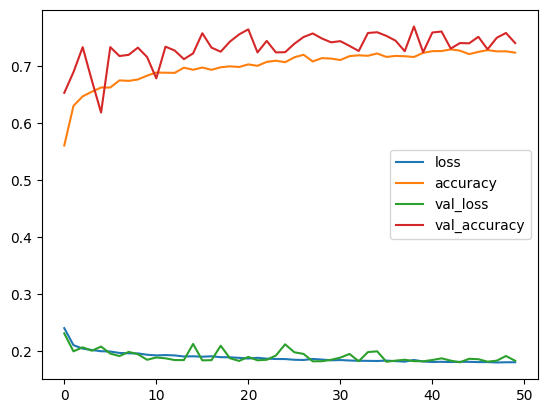

In [ ]:
Grap_Data = pd.DataFrame(CNN_Model.history)
Grap_Data.plot()

In [ ]:
print(yTrain.shape)
print(yTest.shape)
print(yTrain[:,:1].shape) # for age
print(yTest[:,:1].shape)

(21334, 3)
(2371, 3)
(21334, 1)
(2371, 1)


In [ ]:
A_yTrain = yTrain[:,:1]
A_yTest = yTest[:,:1]

In [ ]:
#AGE MODEL
Model_A = Sequential()

Model_A.add(Conv2D(32,(3,3),activation="relu",input_shape=A_INPUT_SHAPE))
Model_A.add(BatchNormalization())
Model_A.add(MaxPooling2D((2,2)))

Model_A.add(GlobalAveragePooling2D())
Model_A.add(Flatten())
Model_A.add(Dense(128,activation="relu"))
Model_A.add(BatchNormalization())
Model_A.add(Dropout(0.5))
Model_A.add(Dense(64,activation="relu"))
Model_A.add(BatchNormalization())
Model_A.add(Dropout(0.5))
Model_A.add(Dense(A_OUTPUT_CLASS,activation="sigmoid"))

In [ ]:
Model_A.compile(optimizer=A_COMPILE_OPTIMIZER,loss=A_COMPILE_LOSS,metrics=A_COMPILE_METRICS)

In [ ]:
A_CNN_Model = Model_A.fit(xTrain,A_yTrain,
                      validation_data=(xTest,A_yTest),
                      callbacks=Early_Stopper,
                      batch_size=12,
                      epochs=50)

Epoch 1/50
1778/1778 [==============================] - 56s 31ms/step - loss: 0.1889 - accuracy: 0.5622 - val_loss: 0.2518 - val_accuracy: 0.2995
Epoch 2/50
1778/1778 [==============================] - 57s 32ms/step - loss: 0.1719 - accuracy: 0.6054 - val_loss: 0.1935 - val_accuracy: 0.6782
Epoch 3/50
1778/1778 [==============================] - 54s 31ms/step - loss: 0.1665 - accuracy: 0.6155 - val_loss: 0.1652 - val_accuracy: 0.5812
Epoch 4/50
1778/1778 [==============================] - 56s 31ms/step - loss: 0.1645 - accuracy: 0.6181 - val_loss: 0.3304 - val_accuracy: 0.1801
Epoch 5/50
1778/1778 [==============================] - 54s 30ms/step - loss: 0.1627 - accuracy: 0.6243 - val_loss: 0.1811 - val_accuracy: 0.5011
Epoch 6/50
1778/1778 [==============================] - 54s 30ms/step - loss: 0.1619 - accuracy: 0.6210 - val_loss: 0.2119 - val_accuracy: 0.6765
Epoch 7/50
1778/1778 [==============================] - 55s 31ms/step - loss: 0.1613 - accuracy: 0.6192 - val_loss: 0.1481 -

In [ ]:
Model_Results = Model_A.evaluate(xTest,A_yTest)
print("LOSS:  " + "%.4f" % Model_Results[0])
print("ACCURACY:  " + "%.2f" % Model_Results[1])

75/75 [==============================] - 2s 24ms/step - loss: 0.1494 - accuracy: 0.6951
LOSS:  0.1494
ACCURACY:  0.70


<Axes: >

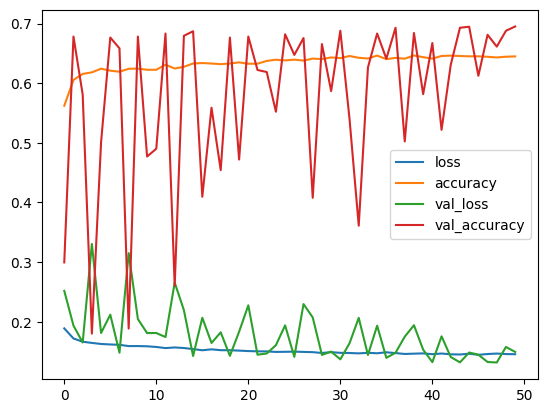

In [ ]:
Grap_Data = pd.DataFrame(A_CNN_Model.history)
Grap_Data.plot()

In [ ]:
print(yTrain)

[[0. 2. 1.]
 [2. 4. 1.]
 [0. 2. 0.]
 ...
 [2. 4. 1.]
 [0. 0. 0.]
 [1. 2. 1.]]


In [ ]:
print(yTrain[:,1:2]) # for ethnicity

[[2.]
 [4.]
 [2.]
 ...
 [4.]
 [0.]
 [2.]]


In [ ]:
print(yTrain[:,1:2].shape)

(21334, 1)


In [ ]:
E_yTrain = yTrain[:,1:2]
E_yTest = yTest[:,1:2]

In [ ]:
#ETHENCITY MODEL
Model_E = Sequential()

Model_E.add(Conv2D(32,(3,3),activation="relu",input_shape=E_INPUT_SHAPE))
Model_E.add(BatchNormalization())
Model_E.add(MaxPooling2D((2,2)))

Model_E.add(GlobalAveragePooling2D())
Model_E.add(Flatten())
Model_E.add(Dense(128,activation="relu"))
Model_E.add(BatchNormalization())
Model_E.add(Dropout(0.5))
Model_E.add(Dense(64,activation="relu"))
Model_E.add(BatchNormalization())
Model_E.add(Dropout(0.5))
Model_E.add(Dense(E_OUTPUT_CLASS,activation="sigmoid"))

In [ ]:
Model_E.compile(optimizer=E_COMPILE_OPTIMIZER,loss=E_COMPILE_LOSS,metrics=E_COMPILE_METRICS)

In [ ]:
E_CNN_Model = Model_E.fit(xTrain,E_yTrain,
                      validation_data=(xTest,E_yTest),
                      callbacks=Early_Stopper,
                      batch_size=12,
                      epochs=2)

Epoch 1/2
1778/1778 [==============================] - 55s 30ms/step - loss: 29893272.0000 - accuracy: 0.4433 - val_loss: 117925.4375 - val_accuracy: 0.4218
Epoch 2/2
1778/1778 [==============================] - 53s 30ms/step - loss: 393145.2188 - accuracy: 0.4255 - val_loss: 11885.0000 - val_accuracy: 0.4218


In [ ]:
Model_Results = Model_E.evaluate(xTest,E_yTest)
print("LOSS:  " + "%.4f" % Model_Results[0])
print("ACCURACY:  " + "%.2f" % Model_Results[1])

75/75 [==============================] - 2s 20ms/step - loss: 11885.0029 - accuracy: 0.4218
LOSS:  11885.0029
ACCURACY:  0.42


<Axes: >

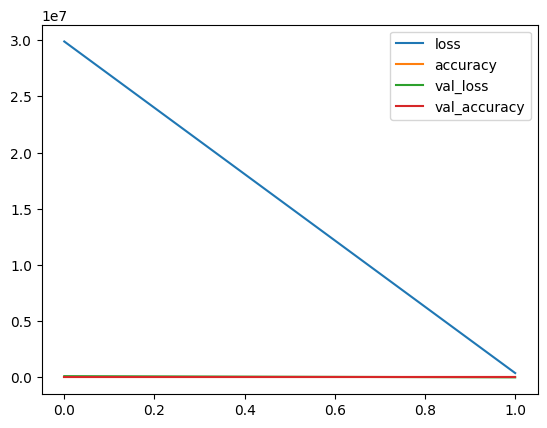

In [ ]:
Grap_Data = pd.DataFrame(E_CNN_Model.history)
Grap_Data.plot()


In [ ]:
G_yTrain = yTrain[:,2:3]
G_yTest = yTest[:,2:3]

In [ ]:
#GENDER MODEL
Model_G = Sequential()

Model_G.add(Conv2D(32,(3,3),activation="relu",input_shape=G_INPUT_SHAPE))
Model_G.add(BatchNormalization())
Model_G.add(MaxPooling2D((2,2)))

Model_G.add(Conv2D(64,(3,3),activation="relu"))
Model_G.add(Dropout(0.3))
Model_G.add(MaxPooling2D((2,2)))
Model_G.add(BatchNormalization())

Model_G.add(Conv2D(128,(3,3),activation="relu"))
Model_G.add(Dropout(0.3))
Model_G.add(MaxPooling2D((2,2)))
Model_G.add(BatchNormalization())


Model_G.add(Flatten())
Model_G.add(Dense(128,activation="relu"))
Model_G.add(BatchNormalization())
Model_G.add(Dropout(0.5))
Model_G.add(Dense(64,activation="relu"))
Model_G.add(BatchNormalization())
Model_G.add(Dropout(0.5))
Model_G.add(Dense(G_OUTPUT_CLASS,activation="softmax"))

In [ ]:
Model_G.compile(optimizer=G_COMPILE_OPTIMIZER,loss=G_COMPILE_LOSS,metrics=G_COMPILE_METRICS)

In [ ]:
G_CNN_Model = Model_G.fit(xTrain,G_yTrain,
                      validation_data=(xTest,G_yTest),
                      callbacks=Early_Stopper,
                      batch_size=12,
                      epochs=50)

Epoch 1/50
1778/1778 [==============================] - 142s 79ms/step - loss: 1.0441 - accuracy: 0.4780 - val_loss: 1.0578 - val_accuracy: 0.4711
Epoch 2/50
1778/1778 [==============================] - 138s 78ms/step - loss: 1.0441 - accuracy: 0.4780 - val_loss: 1.0578 - val_accuracy: 0.4711
Epoch 3/50
1778/1778 [==============================] - 138s 77ms/step - loss: 1.0441 - accuracy: 0.4780 - val_loss: 1.0578 - val_accuracy: 0.4711
Epoch 4/50
1778/1778 [==============================] - 137s 77ms/step - loss: 1.0441 - accuracy: 0.4780 - val_loss: 1.0578 - val_accuracy: 0.4711
Epoch 5/50
1778/1778 [==============================] - 137s 77ms/step - loss: 1.0441 - accuracy: 0.4780 - val_loss: 1.0578 - val_accuracy: 0.4711
Epoch 6/50
1778/1778 [==============================] - 138s 77ms/step - loss: 1.0441 - accuracy: 0.4780 - val_loss: 1.0578 - val_accuracy: 0.4711


In [ ]:
Model_Results = Model_G.evaluate(xTest,G_yTest)
print("LOSS:  " + "%.4f" % Model_Results[0])
print("ACCURACY:  " + "%.2f" % Model_Results[1])

75/75 [==============================] - 3s 35ms/step - loss: 1.0578 - accuracy: 0.4711
LOSS:  1.0578
ACCURACY:  0.47


<Axes: >

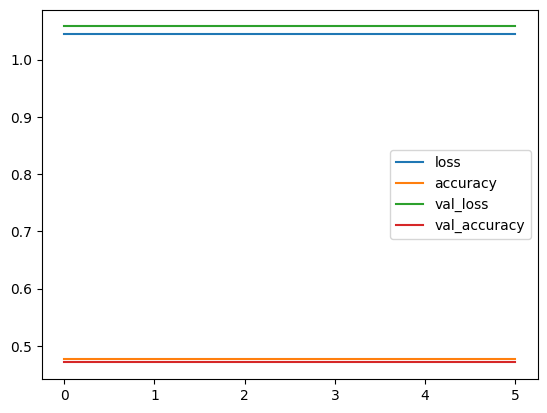

In [ ]:
Grap_Data = pd.DataFrame(G_CNN_Model.history)
Grap_Data.plot()

In [ ]:
X_Train = np.zeros(shape=(23705,2304))

for indexing in range(len(Main_G_A_E_Path["pixels"])):
    X_Train[indexing] = Main_G_A_E_Path["pixels"][indexing]

In [ ]:
X = X_Train # pixels
Y = Main_G_A_E_Path.iloc[:,:-1] # prediction targets

In [ ]:
print(X.shape)
print(Y.shape)

(23705, 2304)
(23705, 3)


In [ ]:
print(Y)

       age  ethnicity  gender
0      2.0        2.0     0.0
1      2.0        2.0     0.0
2      2.0        2.0     0.0
3      2.0        2.0     0.0
4      2.0        2.0     0.0
...    ...        ...     ...
23700  1.0        0.0     1.0
23701  1.0        1.0     1.0
23702  1.0        2.0     1.0
23703  1.0        2.0     1.0
23704  1.0        0.0     1.0

[23705 rows x 3 columns]


In [ ]:
Y.ethnicity=Y.ethnicity.astype('object')

In [ ]:
print(Y.ethnicity)

0        2.0
1        2.0
2        2.0
3        2.0
4        2.0
        ... 
23700    0.0
23701    1.0
23702    2.0
23703    2.0
23704    0.0
Name: ethnicity, Length: 23705, dtype: object


In [ ]:
Y_ethnicity=np.array(to_categorical(Y.ethnicity))

In [ ]:
print("Ethnicity Labels:",Y_ethnicity.shape)

Ethnicity Labels: (23705, 5)


In [ ]:
X = X_Train.reshape(-1,48,48,1)

In [ ]:
print(X.shape)

(23705, 48, 48, 1)


In [ ]:
xTrain,xTest,yTrain,yTest = train_test_split(X,Y_ethnicity,train_size=0.9,random_state=42,shuffle=True)

In [ ]:
print(xTrain.shape)
print(xTest.shape)
print(yTest.shape)
print(yTrain.shape)

(21334, 48, 48, 1)
(2371, 48, 48, 1)
(2371, 5)
(21334, 5)


In [ ]:
print(yTest)

[[0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 ...
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]]


In [ ]:
print(xTest[1])

[[[0.72941178]
  [0.25490198]
  [0.14901961]
  ...
  [0.61960787]
  [0.60784316]
  [0.60000002]]

 [[0.3764706 ]
  [0.16078432]
  [0.13725491]
  ...
  [0.627451  ]
  [0.6156863 ]
  [0.59607846]]

 [[0.19607843]
  [0.14509805]
  [0.14509805]
  ...
  [0.63137257]
  [0.61176473]
  [0.58823532]]

 ...

 [[0.76078433]
  [0.78431374]
  [0.7764706 ]
  ...
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.77254903]
  [0.80784315]
  [0.79215688]
  ...
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.76078433]
  [0.79607844]
  [0.7764706 ]
  ...
  [0.        ]
  [0.        ]
  [0.        ]]]


In [ ]:
#VGG19 Model
Model_L = Sequential()

Model_L.add(Conv2D(32,(3,3),activation="relu",input_shape=L_INPUT_SHAPE))
Model_L.add(BatchNormalization())
Model_L.add(MaxPooling2D((2,2)))

Model_L.add(Conv2D(64,(3,3),activation="relu"))
Model_L.add(Dropout(0.3))
Model_L.add(MaxPooling2D((2,2)))
Model_L.add(BatchNormalization())

Model_L.add(Conv2D(128,(3,3),activation="relu"))
Model_L.add(Dropout(0.3))
Model_L.add(MaxPooling2D((2,2)))
Model_L.add(BatchNormalization())


Model_L.add(Flatten())
Model_L.add(Dense(128,activation="relu"))
Model_L.add(BatchNormalization())
Model_L.add(Dropout(0.5))
Model_L.add(Dense(64,activation="relu"))
Model_L.add(BatchNormalization())
Model_L.add(Dropout(0.5))
Model_L.add(Dense(L_OUTPUT_CLASS,activation="softmax"))

In [ ]:
Model_L.compile(optimizer=L_COMPILE_OPTIMIZER,loss=L_COMPILE_LOSS,metrics=L_COMPILE_METRICS)

In [ ]:
L_CNN_Model = Model_L.fit(xTrain,yTrain,
                      validation_data=(xTest,yTest),
                      callbacks=Early_Stopper,
                      batch_size=12,
                      epochs=50)

Epoch 1/50
1778/1778 [==============================] - 140s 78ms/step - loss: 1.3438 - accuracy: 0.5112 - val_loss: 1.1461 - val_accuracy: 0.5306
Epoch 2/50
1778/1778 [==============================] - 141s 79ms/step - loss: 0.9324 - accuracy: 0.6657 - val_loss: 0.7960 - val_accuracy: 0.7216
Epoch 3/50
1778/1778 [==============================] - 136s 77ms/step - loss: 0.8531 - accuracy: 0.7026 - val_loss: 0.7400 - val_accuracy: 0.7444
Epoch 4/50
1778/1778 [==============================] - 140s 79ms/step - loss: 0.8079 - accuracy: 0.7226 - val_loss: 0.8366 - val_accuracy: 0.6976
Epoch 5/50
1778/1778 [==============================] - 137s 77ms/step - loss: 0.7708 - accuracy: 0.7326 - val_loss: 0.7213 - val_accuracy: 0.7250
Epoch 6/50
1778/1778 [==============================] - 140s 79ms/step - loss: 0.7429 - accuracy: 0.7460 - val_loss: 0.8853 - val_accuracy: 0.6630
Epoch 7/50
1778/1778 [==============================] - 136s 77ms/step - loss: 0.7147 - accuracy: 0.7538 - val_loss: 0

In [ ]:
Model_Results = Model_L.evaluate(xTest,yTest)
print("LOSS:  " + "%.4f" % Model_Results[0])
print("ACCURACY:  " + "%.2f" % Model_Results[1])

75/75 [==============================] - 3s 35ms/step - loss: 0.5543 - accuracy: 0.8043
LOSS:  0.5543
ACCURACY:  0.80


<Axes: >

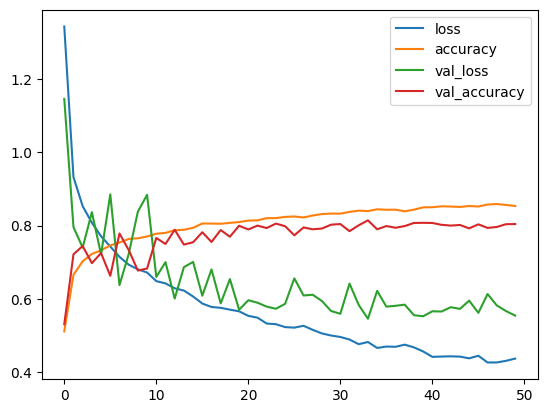

In [ ]:
Grap_Data = pd.DataFrame(L_CNN_Model.history)
Grap_Data.plot()

In [ ]:
#perform prediction
Prediction_Results = Model_L.predict(xTest)

75/75 [==============================] - 4s 45ms/step


In [ ]:
Model_Test_Prediction = Prediction_Results.argmax(axis=-1)

In [ ]:
Model_True_Values = yTest.argmax(axis=-1)

In [ ]:
print(confusion_matrix(Model_True_Values,Model_Test_Prediction))

[[886  22  40  41  11]
 [ 27 399   3  23  11]
 [ 25   5 282   6   4]
 [ 69  18   7 302   9]
 [ 87  17   9  30  38]]


In [ ]:
print(classification_report(Model_True_Values,Model_Test_Prediction))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85      1000
           1       0.87      0.86      0.86       463
           2       0.83      0.88      0.85       322
           3       0.75      0.75      0.75       405
           4       0.52      0.21      0.30       181

    accuracy                           0.80      2371
   macro avg       0.75      0.72      0.72      2371
weighted avg       0.79      0.80      0.79      2371



In [ ]:
print(Model_Test_Prediction)

[1 1 4 ... 1 3 0]


In [ ]:
print(yTest[1].argmax(axis=-1))

1


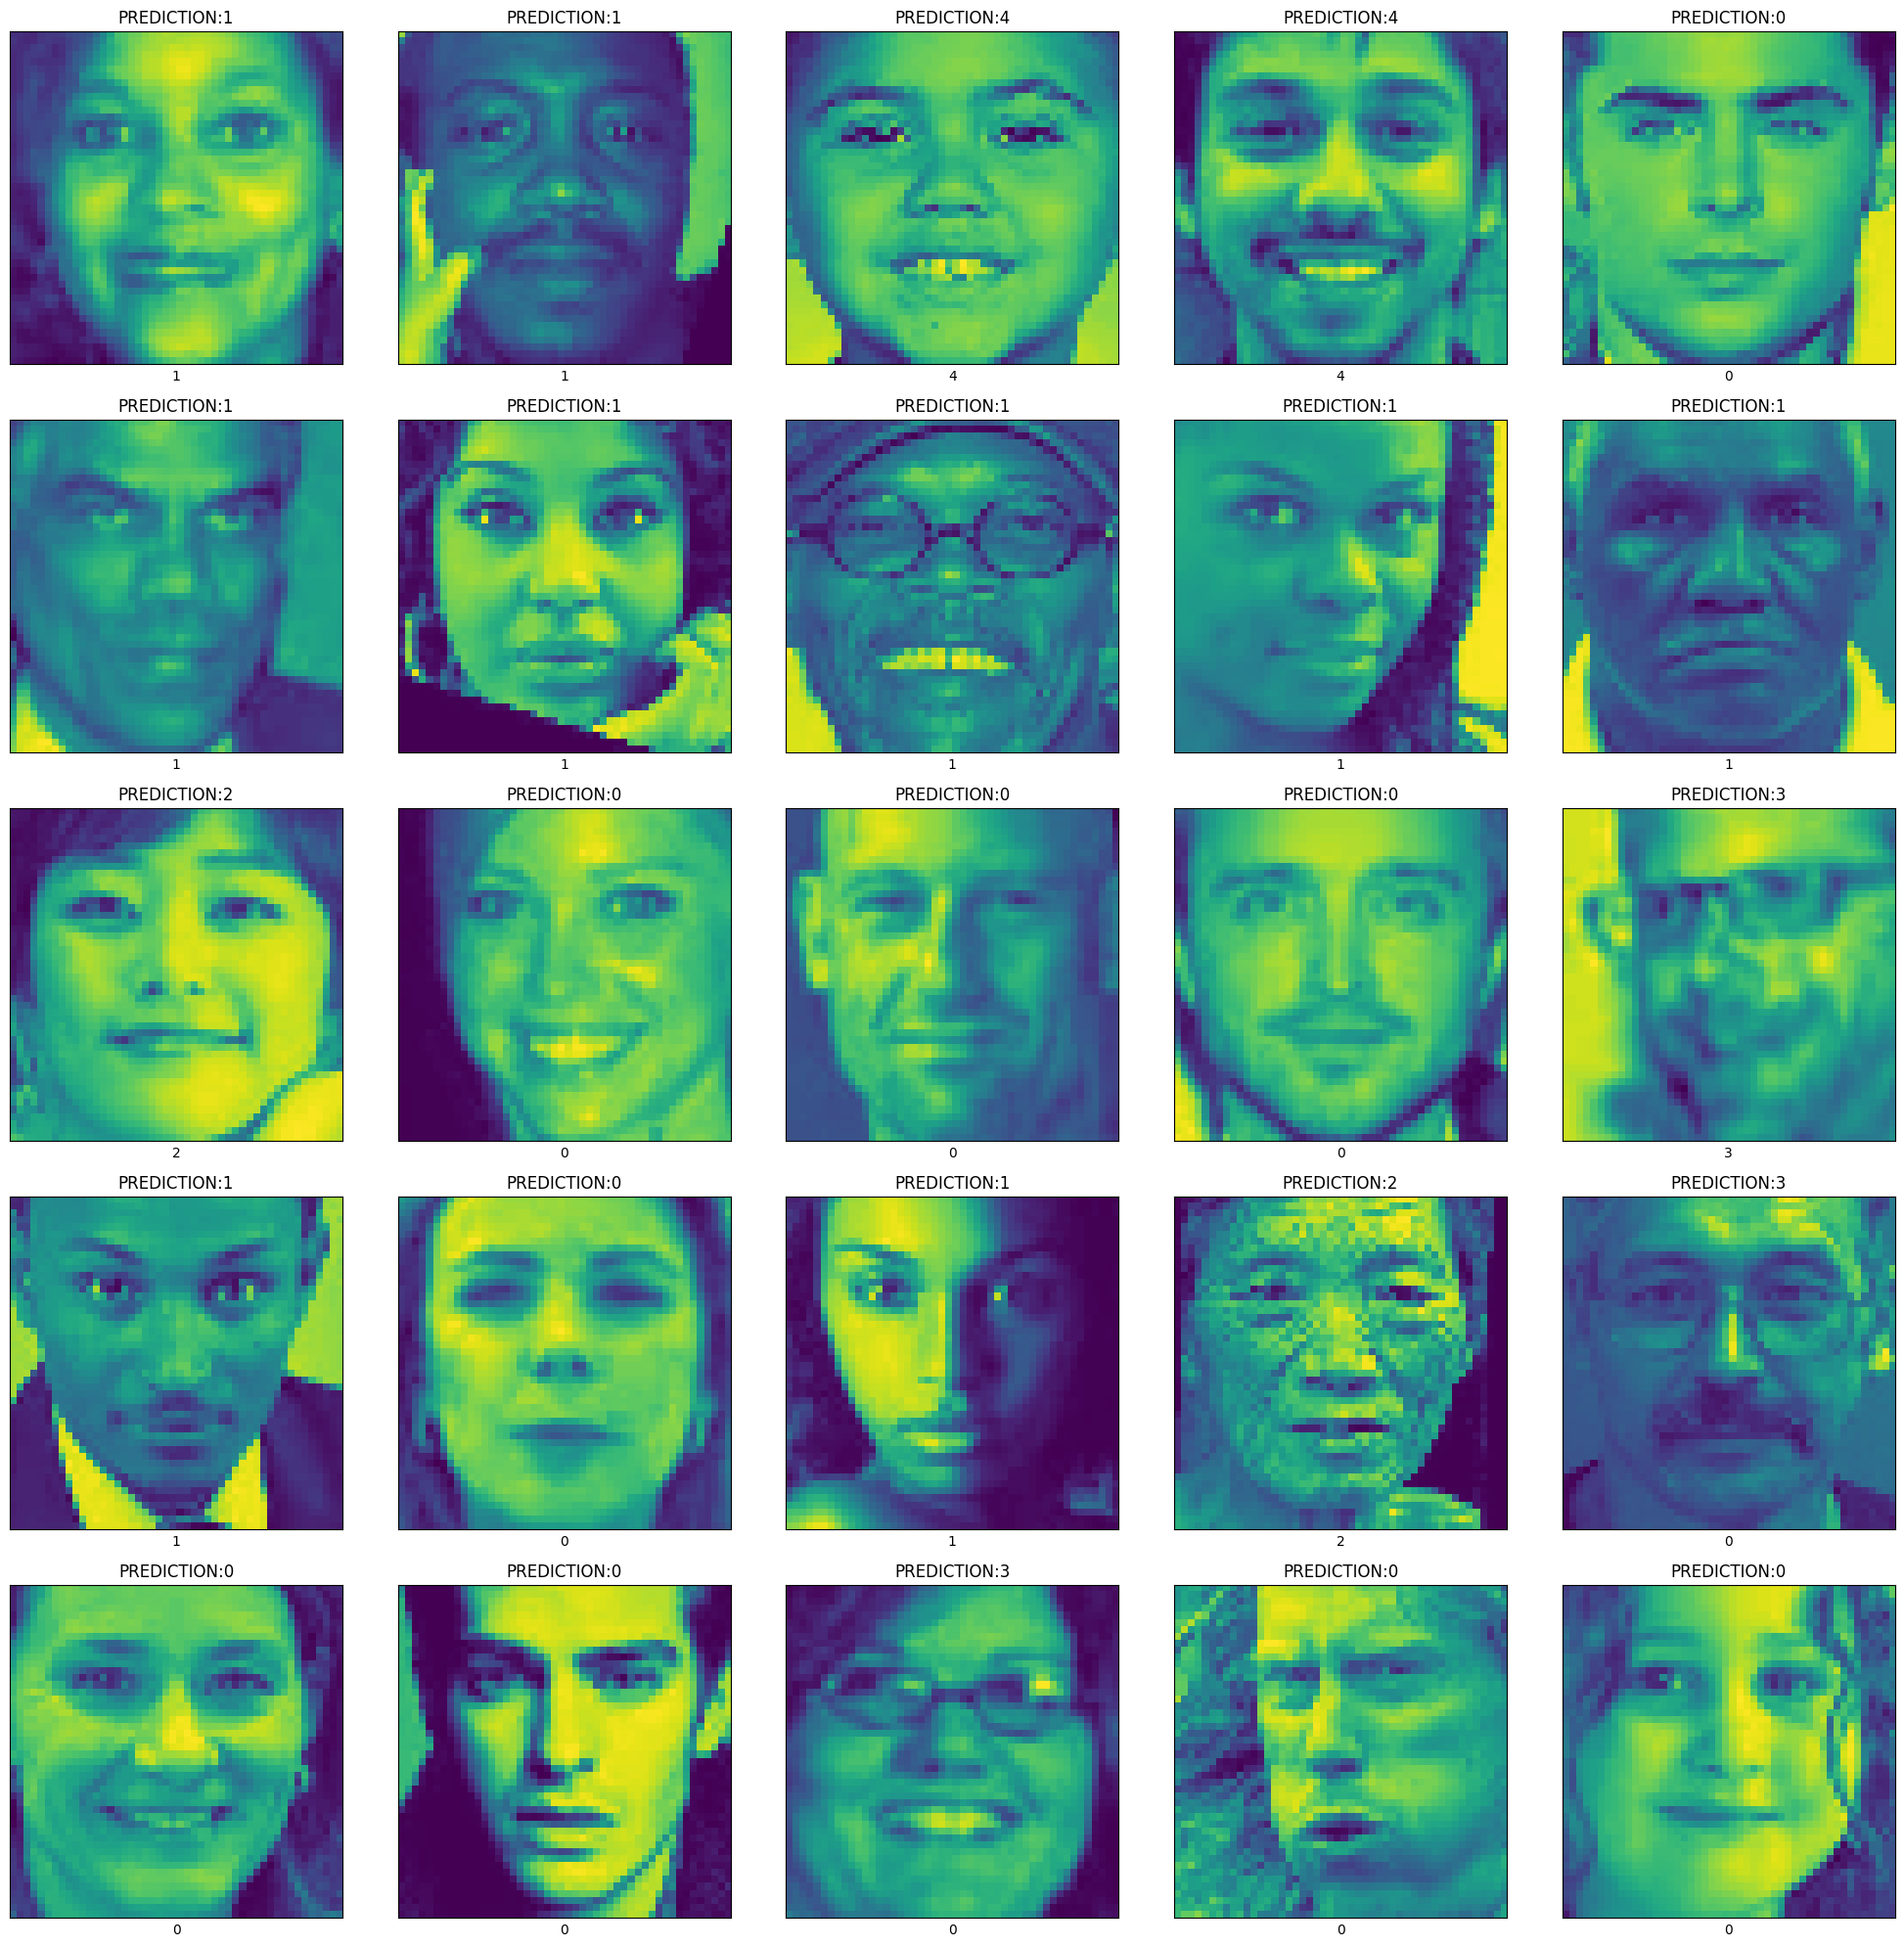

In [ ]:
fig, axes = plt.subplots(nrows=5,
                         ncols=5,
                         figsize=(20, 20),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(xTest[i])
    ax.set_title(f"PREDICTION:{Model_Test_Prediction[i]}")
    ax.set_xlabel(yTest[i].argmax(axis=-1))
plt.tight_layout()
plt.show()

In [ ]:
gender_predictions = Model_G.predict(xTest)
age_predictions = Model_A.predict(xTest)


75/75 [==============================] - 1s 17ms/step


In [ ]:
gender_classes = ["Male", "Female"]
age_classes = ["Teen", "Middle", "Old"]

gender_predictions = np.argmax(gender_predictions, axis=1)  # 将预测的概率转换为类别标签（0、1）
gender_predictions = [gender_classes[pred] for pred in gender_predictions]  # 将类别标签转换为具体的性别类别

age_predictions = np.argmax(age_predictions, axis=1)  # 将预测的概率转换为类别标签（0、1、2）
age_predictions = [age_classes[pred] for pred in age_predictions]  # 将类别标签转换为具体的年龄类别



In [ ]:
results = pd.DataFrame({"Gender": gender_predictions, "Age": age_predictions})
results.to_csv("/content/drive/MyDrive/巨量資料/gender_age_predictions.csv", index=False)


In [ ]:
import pandas as pd

# 指定 CSV 檔案路徑
csv_file_path = "/content/drive/MyDrive/巨量資料/gender_age_predictions.csv"

# 使用 pandas 讀取 CSV 檔案
data = pd.read_csv(csv_file_path)

# 查看資料的前幾筆記錄
print(data.head())


  Gender   Age
0   Male  Teen
1   Male  Teen
2   Male  Teen
3   Male  Teen
4   Male  Teen


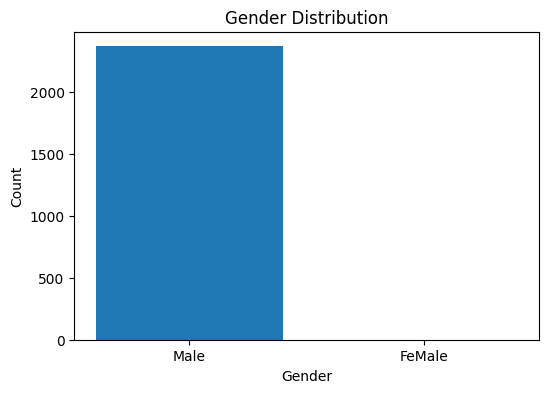

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 指定 CSV 檔案路徑
csv_file_path = "/content/drive/MyDrive/巨量資料/gender_age_predictions.csv"

# 使用 pandas 讀取 CSV 檔案
data = pd.read_csv(csv_file_path)

# 計算各類別的數量
gender_counts = data["Gender"].value_counts()

# 創建性別類別的列表
gender_categories = ["Male", "FeMale"]

# 創建空的頻率列表
gender_frequency = []

# 確保 Male 和 Female 都在結果中
for gender_category in gender_categories:
    if gender_category in gender_counts.index:
        gender_frequency.append(gender_counts[gender_category])
    else:
        gender_frequency.append(0)

# 繪製性別長條圖
plt.figure(figsize=(6, 4))
plt.bar(gender_categories, gender_frequency)
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Gender Distribution")
plt.show()


In [ ]:
#安裝套件用於抓取google drive圖片
!mkdir -p faceD_train
!pip install --upgrade --no-cache-dir gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
url='https://drive.google.com/file/d/1_ZyGOJHz4CpMaj_Zc5PXvjcPJxBVo-f4/view?usp=sharing'
output='faceD_train/faceD.zip'

import gdown
gdown.download(url=url,output=output,quiet=False,fuzzy=True)

Downloading...
From: https://drive.google.com/uc?id=1_ZyGOJHz4CpMaj_Zc5PXvjcPJxBVo-f4
To: /content/faceD_train/faceD.zip
100%|██████████| 197k/197k [00:00<00:00, 77.9MB/s]


'faceD_train/faceD.zip'

In [ ]:
!unzip faceD_train/faceD.zip -d faceD_train

Archive:  faceD_train/faceD.zip
replace faceD_train/faceD/Female_Middle/FM (1).jfif? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
# 將模型保存為.h5檔案
Model_G.save('gender_model.h5')
Model_A.save('age_model.h5')

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
import os
import cv2
import numpy as np

# 設定類別對應的數字

GENDERS = { 
    0: "男性", 
    1: "女性"
}

# 載入模型
age_model = load_model("age_model.h5")
gender_model = load_model("gender_model.h5")

# 匯入人臉圖像資料夾
image_folder = "faceD_train"
image_files = os.listdir(image_folder)

for file in image_files:
    file_path = os.path.join(image_folder, file)
    image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)  # 直接以灰度格式讀取圖像
    image = cv2.resize(image, (48, 48))
    image = np.array(image, dtype="float32") / 255.
    image = image.reshape(-1, 48, 48, 1)
    
    # 預測年齡、種族和性別
    predicted_age = age_model.predict(image)
    predicted_gender = gender_model.predict(image)
    
    # 預測年齡、種族和性別
    predicted_age = age_model.predict(image)
    predicted_gender = gender_model.predict(image)
    
    # 取得最高機率對應的類別
    age_class = np.argmax(predicted_age)
    gender_class = np.argmax(predicted_gender)
    
    # 將類別轉換為對應的字串
    age = ETHNICITIES[age_class]
    gender = GENDERS[gender_class]
    
    # 顯示預測結果
    print(f"圖像: {file}")
    print(f"年齡: {age}")
    print(f"性別: {gender}")
    print("------------------------------------")
